In [1]:
import pandas as pd
import matplotlib.pyplot as py
import numpy as np

In [2]:
data = pd.read_csv('overdoses.csv', sep =',')
print("The shape of the data is :",data.shape)
data.head()

The shape of the data is : (50, 4)


State  Population Deaths Abbrev
0     Alabama   4,833,722    723     AL
1      Alaska     735,132    124     AK
2     Arizona   6,626,624  1,211     AZ
3    Arkansas   2,959,373    356     AR
4  California  38,332,521  4,521     CA

In [3]:
'''
Creating ODD Column
'''

data['Population'] = data['Population'].str.replace(',', '')
data['Deaths'] = data['Deaths'].str.replace(',', '')
data[data.columns[1:3]] = data[data.columns[1:3]].astype(int)
data.dtypes

State         object
Population     int32
Deaths         int32
Abbrev        object
dtype: object

In [4]:
'''
Plotting Pearson correlation coefficient btw Population and Deaths
'''

data[data.columns[1:3]].corr(method ='pearson')

Population    Deaths
Population    1.000000  0.939921
Deaths        0.939921  1.000000

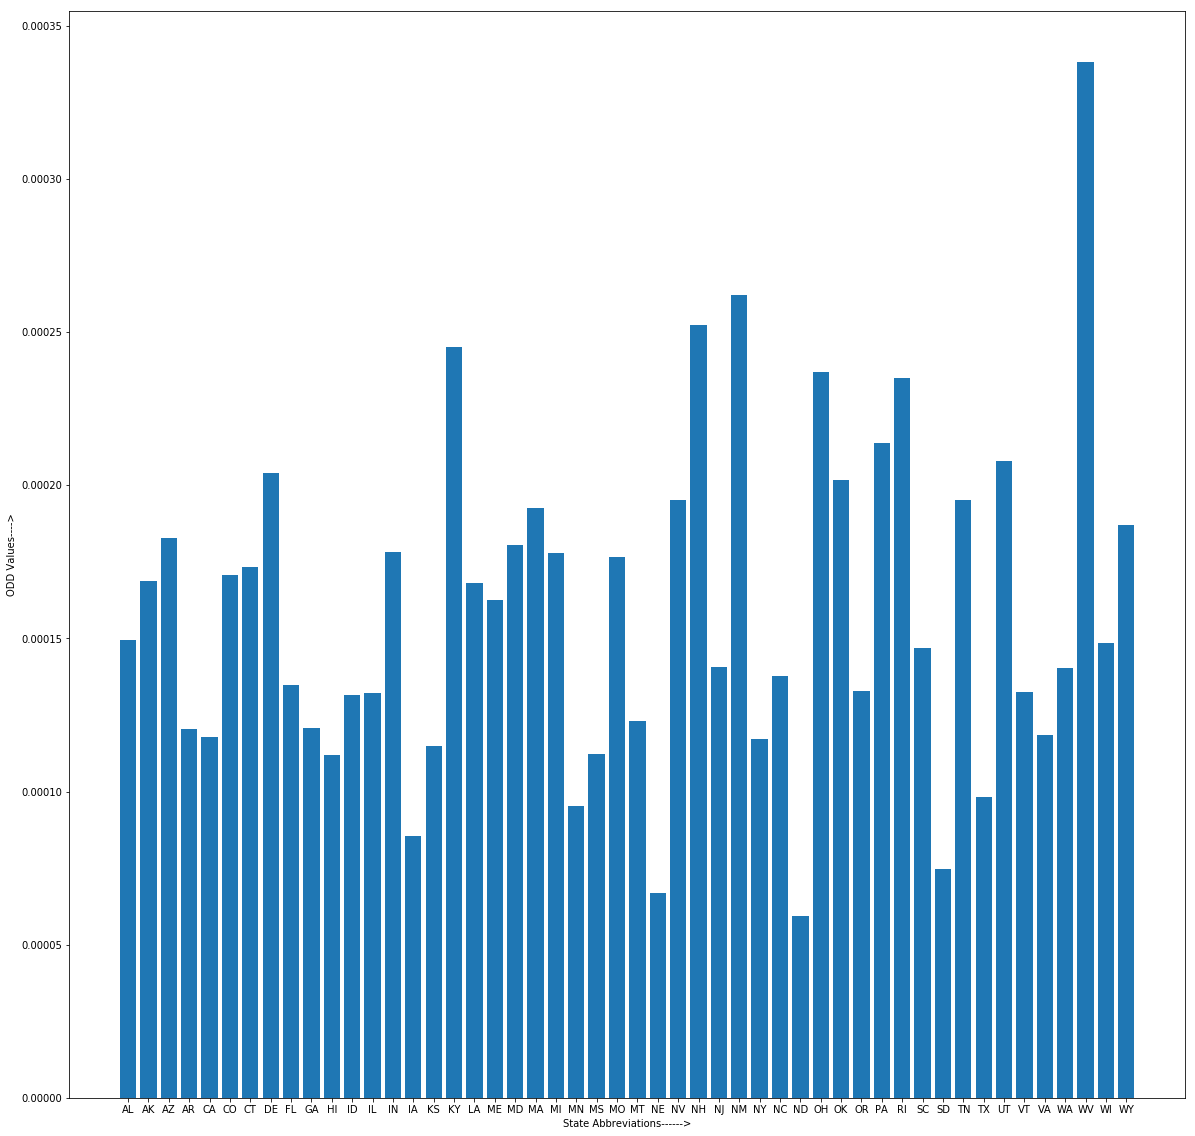

In [5]:
'''
Plotting Bar graph for ODD
'''

data['ODD'] = data['Deaths']/data['Population']
py.figure(figsize=(20,20))
py.bar(np.arange(50), data['ODD'])
py.xticks(np.arange(50), data['Abbrev'])
py.xlabel('State Abbreviations------>')
py.ylabel('ODD Values---->')
py.show()

In [6]:
'''
Creating 50x50 distance Matrix
'''

sim_data = pd.DataFrame(data['Abbrev'])
for i in range(50):
    sim_data[i] =  data['ODD'] - data.iloc[i, -1]
print("The shape of the matrix is : ", sim_data.shape)
sim_data.head()

The shape of the matrix is :  (50, 51)


Abbrev         0         1         2         3         4         5  \
0     AL  0.000000 -0.000019 -0.000033  0.000029  0.000032 -0.000021   
1     AK  0.000019  0.000000 -0.000014  0.000048  0.000051 -0.000002   
2     AZ  0.000033  0.000014  0.000000  0.000062  0.000065  0.000012   
3     AR -0.000029 -0.000048 -0.000062  0.000000  0.000002 -0.000050   
4     CA -0.000032 -0.000051 -0.000065 -0.000002  0.000000 -0.000053   

          6         7         8    ...           40        41        42  \
0 -0.000024 -0.000055  0.000015    ...     0.000075 -0.000046  0.000051   
1 -0.000005 -0.000035  0.000034    ...     0.000094 -0.000027  0.000070   
2  0.000010 -0.000021  0.000048    ...     0.000108 -0.000013  0.000084   
3 -0.000053 -0.000084 -0.000014    ...     0.000046 -0.000075  0.000022   
4 -0.000055 -0.000086 -0.000017    ...     0.000043 -0.000077  0.000020   

         43        44            45        46        47        48        49  
0 -0.000058  0.000017  3.093593e-05  0.000009 -0.000189  0.000001 -0.000037  
1 -0.000039  0.000036  5.003894e-05  0.000028 -0.000169  0.000020 -0.000018  
2 -0.000025  0.000050  6.410940e-05  0.000042 -0.000155  0.000034 -0.000004  
3 -0.000088 -0.000012  1.657501e-06 -0.000020 -0.000218 -0.000028 -0.000067  
4 -0.000090 -0.000015 -6.966210e-07 -0.000022 -0.000220 -0.000031 -0.000069  

[5 rows x 51 columns]

In [7]:
'''
Scaling and Using Cosine Funciton for Similarity Matrix 
'''

sim_data.iloc[:, 1:] = sim_data.iloc[:, 1:].abs()
sim_data.iloc[:, 1:] = sim_data.iloc[:, 1:]*100000
sim_data.iloc[:, 1:] = sim_data.iloc[:, 1:]/max(sim_data.iloc[:, 1:].max(axis = 1))
sim_data.iloc[:, 1:] = 1-sim_data.iloc[:, 1:]
print("Maximum value is: ",max(sim_data.iloc[:, 1:].max(axis=0)),"Minimum value is: ",min(sim_data.iloc[:, 1:].min(axis=0)))

Maximum value is:  1.0 Minimum value is:  0.0


In [8]:
'''
Appending the Abbrevations to form 51x51 Matrix
'''

l = ['Abbrev']
for i in range(50):
    l.append(data['Abbrev'][i])    
final_sim = pd.DataFrame(l)
final_sim = final_sim.transpose()
final_sim.columns = sim_data.columns
final_sim = pd.concat([final_sim, sim_data], axis = 0)
print("The shape of the Similarity matrix is :", final_sim.shape)
final_sim

The shape of the Similarity matrix is : (51, 51)


Abbrev         0         1         2         3         4         5  \
0   Abbrev        AL        AK        AZ        AR        CA        CO   
0       AL         1  0.931454  0.880966  0.894943  0.886496  0.924407   
1       AK  0.931454         1  0.949512  0.826397   0.81795  0.992953   
2       AZ  0.880966  0.949512         1  0.775909  0.767462  0.956559   
3       AR  0.894943  0.826397  0.775909         1  0.991553   0.81935   
4       CA  0.886496   0.81795  0.767462  0.991553         1  0.810903   
5       CO  0.924407  0.992953  0.956559   0.81935  0.810903         1   
6       CT  0.915067  0.983613    0.9659   0.81001  0.801563   0.99066   
7       DE  0.804138  0.872684  0.923171  0.699081  0.690634  0.879731   
8       FL   0.94667  0.878125  0.827637  0.948272  0.939825  0.871078   
9       GA  0.896374  0.827828   0.77734  0.998569  0.990122  0.820781   
10      HI  0.864527  0.795981  0.745493  0.969584  0.978031  0.788934   
11      ID  0.935155  0.866609  0.816122  0.959788  0.951341  0.859562   
12      IL   0.93821  0.869664  0.819176  0.956733  0.948286  0.862617   
13      IN  0.896703  0.965248  0.984264  0.791645  0.783198  0.972295   
14      IA   0.76982  0.701275  0.650787  0.874878  0.883325  0.694228   
15      KS  0.874942  0.806397  0.755909      0.98  0.988447   0.79935   
16      KY  0.657467  0.726013  0.776501   0.55241  0.543963   0.73306   
17      LA  0.933945  0.997509  0.947021  0.828888  0.820441  0.990462   
18      ME  0.953212  0.978243  0.927755  0.848154  0.839707  0.971196   
19      MD  0.889123  0.957669  0.991844  0.784066  0.775619  0.964716   
20      MA  0.845634   0.91418  0.964668  0.740577   0.73213  0.921227   
21      MI  0.897792  0.966338  0.983174  0.792735  0.784288  0.973385   
22      MN  0.805542  0.736997  0.686509    0.9106  0.919047   0.72995   
23      MS  0.866357  0.797811  0.747324  0.971414  0.979862  0.790765   
24      MO  0.903263  0.971809  0.977703  0.798206  0.789759  0.978856   
25      MT  0.905122  0.836577  0.786089   0.98982  0.981373   0.82953   
26      NE   0.70334  0.634794  0.584307  0.808397  0.816845  0.627748   
27      NV  0.835815   0.90436  0.954848  0.730758   0.72231  0.911407   
28      NH   0.63115  0.699696  0.750184  0.526093  0.517646  0.706743   
29      NJ  0.968506   0.89996  0.849472  0.926437   0.91799  0.892913   
30      NM  0.595465  0.664011  0.714499  0.490408  0.481961  0.671058   
31      NY  0.883266  0.814721  0.764233  0.988324  0.996771  0.807674   
32      NC  0.958093  0.889548   0.83906  0.936849  0.928402  0.882501   
33      ND  0.676587  0.608041  0.557553  0.781644  0.790091  0.600994   
34      OH  0.685764   0.75431  0.804798  0.580707   0.57226  0.761357   
35      OK  0.812644   0.88119  0.931678  0.707587   0.69914  0.888237   
36      OR   0.93989  0.871345  0.820857  0.955052  0.946605  0.864298   
37      PA  0.769274   0.83782  0.888307  0.664217   0.65577  0.844867   
38      RI  0.693832  0.762378  0.812866  0.588775  0.580328  0.769425   
39      SC  0.990086   0.92154  0.871052  0.904857   0.89641  0.914493   
40      SD  0.730858  0.662313  0.611825  0.835916  0.844363  0.655266   
41      TN  0.835741  0.904286  0.954774  0.730683  0.722236  0.911333   
42      TX  0.816172  0.747627  0.697139   0.92123  0.929677   0.74058   
43      UT  0.790827  0.859373  0.909861   0.68577  0.677323   0.86642   
44      VT  0.938571  0.870025  0.819538  0.956372  0.947925  0.862978   
45      VA  0.888995   0.82045  0.769962  0.994053    0.9975  0.813403   
46      WA  0.967192  0.898646  0.848158  0.927751  0.919304  0.891599   
47      WV  0.323413  0.391959  0.442447  0.218356  0.209909  0.399006   
48      WI  0.996275  0.927729  0.877241  0.898668  0.890221  0.920682   
49      WY  0.865444  0.933989  0.984477  0.760386  0.751939  0.941036   

           6         7         8    ...            40        41        42  \
0         CT        DE        FL    ...            SD        TN        TX   
0

In [14]:
final_sim.to_excel("Sim_mat.xlsx",index=False)